# Stock Portfolio 
## Owner: Ryne F. Shelton
### Email:rfshelton@att.net - (206) 651-9090
------------------------------------------------------------------
### Filename: rshelton_stockportfolio_example.ipynb
### Description:
Utilizes Machine Learning (ML) libraries to suggest future portfolio performance and inform trade options. 


### Libraries and Packages
#### ML
SciKit-Learn, Tensorflow
#### Data
yFinance

In [1]:
#https://www.analyticsvidhya.com/blog/2021/10/machine-learning-for-stock-market-prediction-with-step-by-step-implementation/
#Importing the Libraries
import pandas as pd
import numpy as np
import yfinance as yf
%matplotlib inline
import pandas_datareader as data
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils import plot_model

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-03-23 14:14:11.562112: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 14:14:11.568081: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 14:14:11.616303: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 14:14:12.944445: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Global Variables 
Start/End Analysis Dates, Stock Ticker Symbol

In [2]:
# Date format: 'yyyy-mm-dd'
start_date = '2015-03-23'
end_date   = '2023-03-23'
# Stock Tickers
google = 'GOOGL'

In [3]:
import yfinance as yf
ticker = yf.Ticker('GOOGL').info
marketPrice = ticker['regularMarketOpen']
previousClosePrice = ticker['regularMarketPreviousClose']
print('Ticker Value: GOOGL')
print('Market Price Value:', marketPrice)
print('Previous Close Price Value:', previousClosePrice)

Ticker Value: GOOGL
Market Price Value: 149.15
Previous Close Price Value: 147.6


In [4]:
ticker = yf.Ticker(google).info
marketPrice = ticker['regularMarketOpen']
previousClosePrice = ticker['regularMarketPreviousClose']
print('Ticker Value: '+google)
print('Market Price Value:', marketPrice)
print('Previous Close Price Value:', previousClosePrice)

Ticker Value: GOOGL
Market Price Value: 149.15
Previous Close Price Value: 147.6


In [6]:
# downloading the data of the ticker value between
# the start and end dates
df_0 = yf.download(google, start_date, end_date)

# printing the last 5 rows of the data
print('Google Stock Data')
print('--------------------')
print(df_0.tail())

[*********************100%%**********************]  1 of 1 completed

Google Stock Data
--------------------
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-16   96.199997  101.190002   95.500000  100.320000  100.320000   
2023-03-17  100.260002  102.839996  100.099998  101.620003  101.620003   
2023-03-20  100.120003  101.750000   99.870003  101.220001  101.220001   
2023-03-21  101.250000  105.099998  101.220001  104.919998  104.919998   
2023-03-22  104.269997  106.589996  103.330002  103.370003  103.370003   

              Volume  
Date                  
2023-03-16  65492000  
2023-03-17  61028500  
2023-03-20  32960400  
2023-03-21  42110300  
2023-03-22  43427400  


<AxesSubplot:xlabel='Date'>

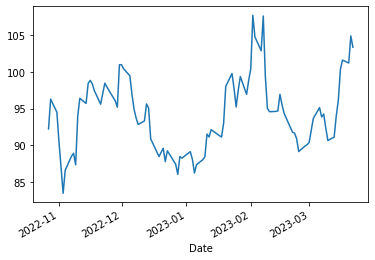

In [7]:
df_0['Adj Close'].tail(100).plot()

In [8]:
target = pd.DataFrame(df_0['Adj Close'])
features = ['Open', 'High','Low', 'Volume']

In [9]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df_0[features])
feature_transform = pd.DataFrame(columns=features,data=feature_transform,index=df_0.index)
feature_transform

,Open,High,Low,Volume
Date,,,,
2015-03-23,0.012945,0.011979,0.013908,0.084414
2015-03-24,0.013965,0.016892,0.015962,0.281799
2015-03-25,0.017590,0.016165,0.015517,0.176550
2015-03-26,0.012403,0.010995,0.011968,0.163526
2015-03-27,0.011271,0.009743,0.011405,0.101836
...,...,...,...,...
2023-03-16,0.558053,0.595714,0.563908,0.226669
2023-03-17,0.590647,0.608961,0.601475,0.208660
2023-03-20,0.589523,0.600210,0.599597,0.095414


In [10]:
timesplit = TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
    x_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index):(len(train_index)+len(test_index))]
    y_train, Y_test = target[:len(train_index)].values.ravel, target[len(train_index):(len(train_index)+len(test_index))].values.ravel()

In [18]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, x_train.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error',optimizer='adam')
lstm.summary()

/home/rshelton/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 32)             │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,769 (18.63 KB)

 Trainable params: 4,769 (18.63 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history=lstm.fit(np.array(x_train),np.array(y_train), epochs=100, batch_size=8, verbose=1, shuffle=False)

IndexError: tuple index out of range

In [22]:
np.array(x_train)

array([[0.0129453 , 0.0119785 , 0.01390782, 0.08441396],
       [0.01396488, 0.01689193, 0.01596173, 0.28179948],
       [0.01758956, 0.01616536, 0.01551666, 0.17655033],
       ...,
       [0.73525742, 0.73532496, 0.72462409, 0.1093726 ],
       [0.71542397, 0.72512881, 0.69741687, 0.10683881],
       [0.68130057, 0.69181861, 0.68945027, 0.06215049]])